In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

In [51]:
df = pd.read_csv("../data/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [54]:
print (set(df.isnull().sum()))
df = df.fillna(df.mean)
print (set(df.isnull().sum()))

{0}
{0}


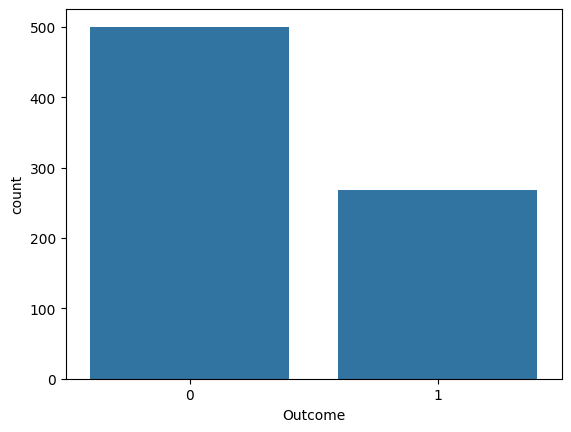

Outcome
0    500
1    268
Name: count, dtype: int64


In [55]:
sns.countplot(data=df, 
             x="Outcome")
plt.show()

print (df['Outcome'].value_counts())

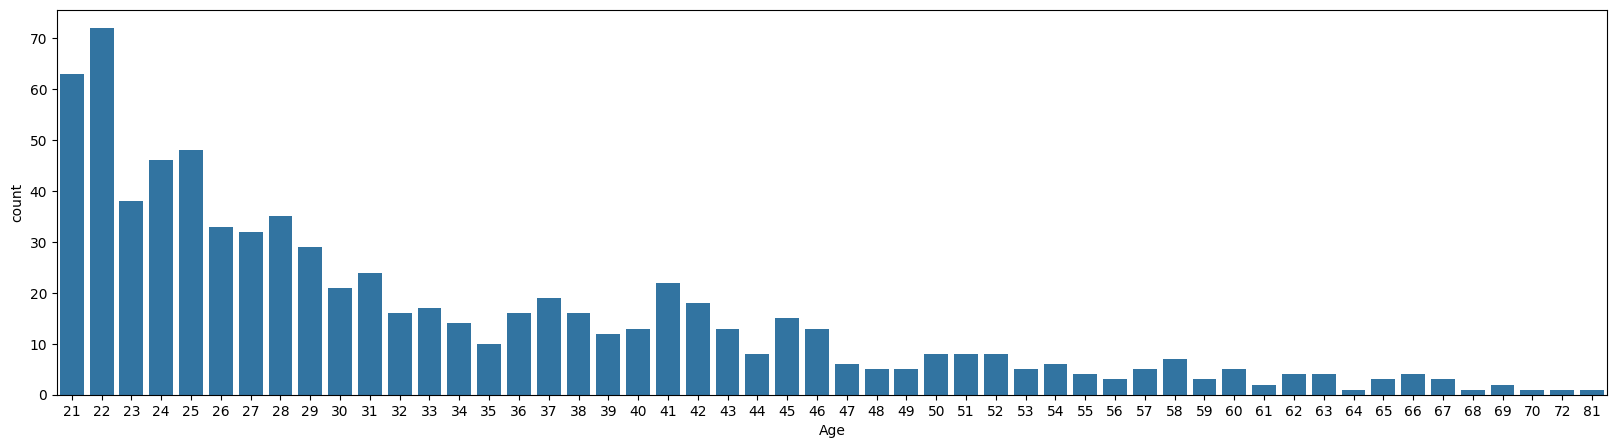

In [56]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, 
             x="Age")
plt.show()

<Axes: >

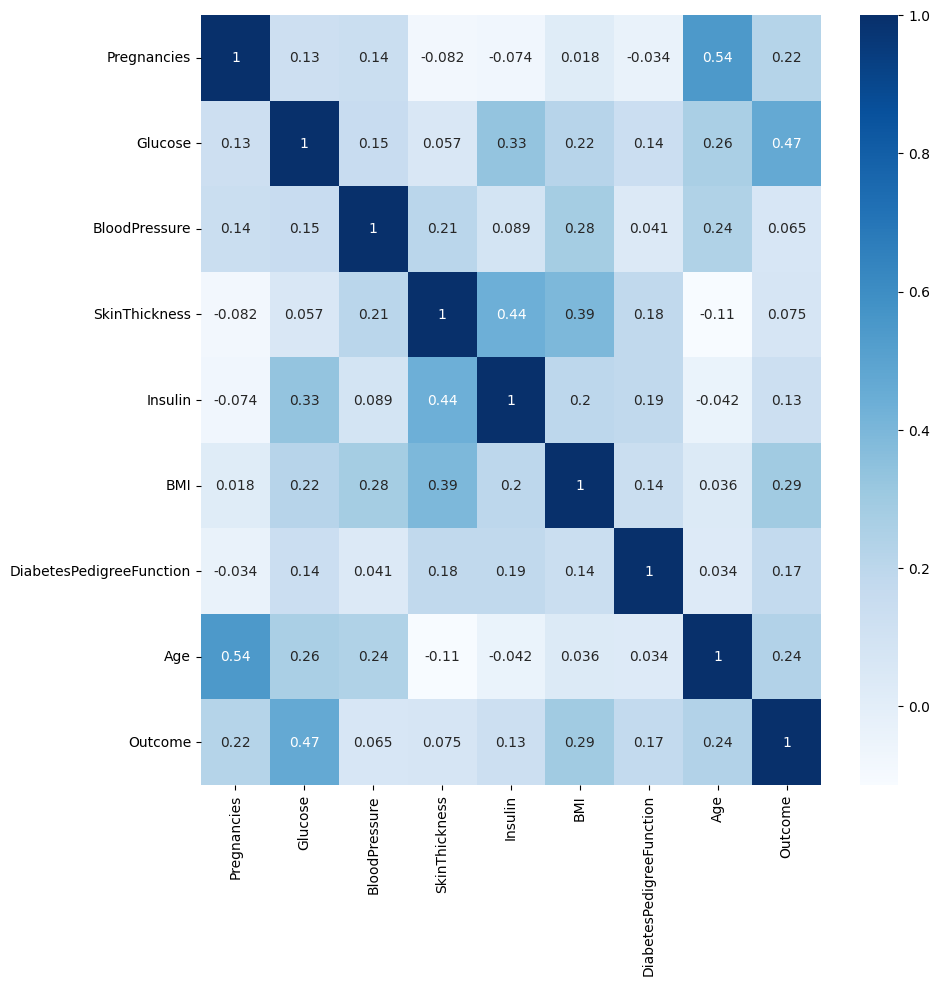

In [57]:
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, 
            cmap='Blues')

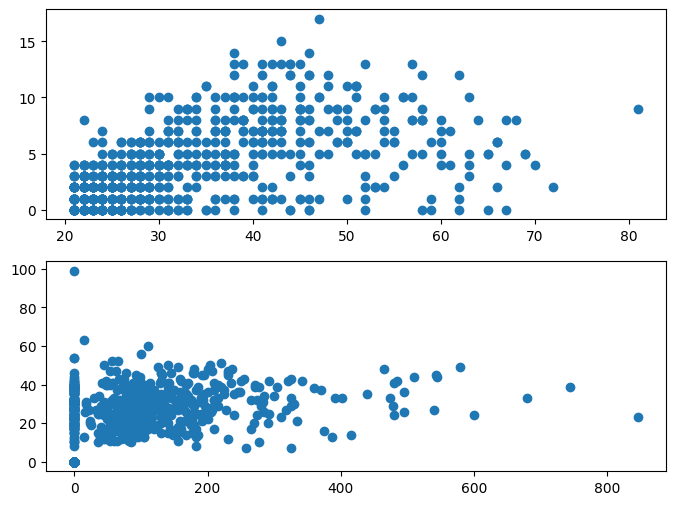

In [58]:
plt.figure(figsize=(8, 6))

'''
    corr (상관계수) 높은 feature끼리 시각화해봄
    Age - Pregnancies
    Insulin - SkinThickness
'''

plt.subplot(211)
plt.scatter (df['Age'],
            df['Pregnancies'])

plt.subplot(212)
plt.scatter (df['Insulin'],
            df['SkinThickness'])

In [59]:
data = df[[feature for feature in df.columns if feature != 'Age' and feature != 'Outcome']]
target = df['Age']

data.shape, target.shape

((768, 7), (768,))

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                   test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 test_size=0.1)

print (X_train.shape, X_test.shape, X_val.shape)

(552, 7) (154, 7) (62, 7)


<Axes: xlabel='Pregnancies', ylabel='Percent'>

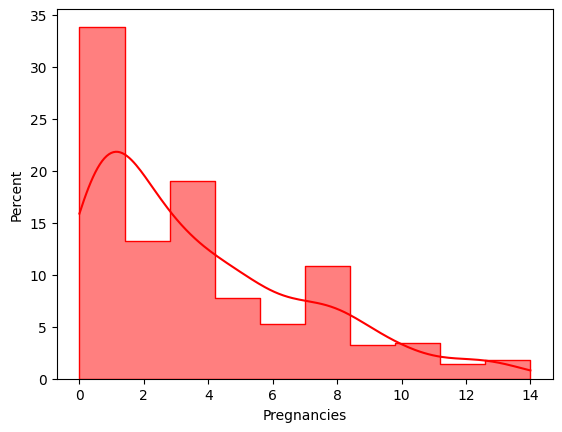

In [61]:
sns.histplot(x=X_train.iloc[:, 0], 
             color='r',
             bins=10,
             kde=True,
             element='step',
             stat='percent', 
             cumulative=False)

In [62]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

X_train_scaled = SS.fit_transform (X_train)
X_test_scaled = SS.transform(X_test)
X_val_scaled = SS.transform(X_val)

<Axes: ylabel='Percent'>

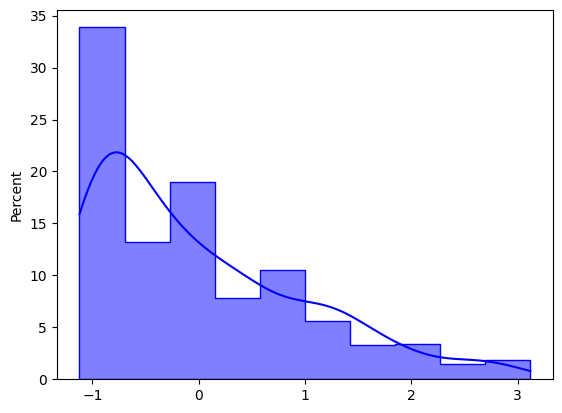

In [63]:
sns.histplot(x=X_train_scaled[:, 0],  
             color='b',
             bins=10,
             kde=True,
             element='step',
             stat='percent', 
             cumulative=False)

---

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 47,937 (187.25 KB)

 Trainable params: 46,945 (183.38 KB)

 Non-trainable params: 992 (3.88 KB)

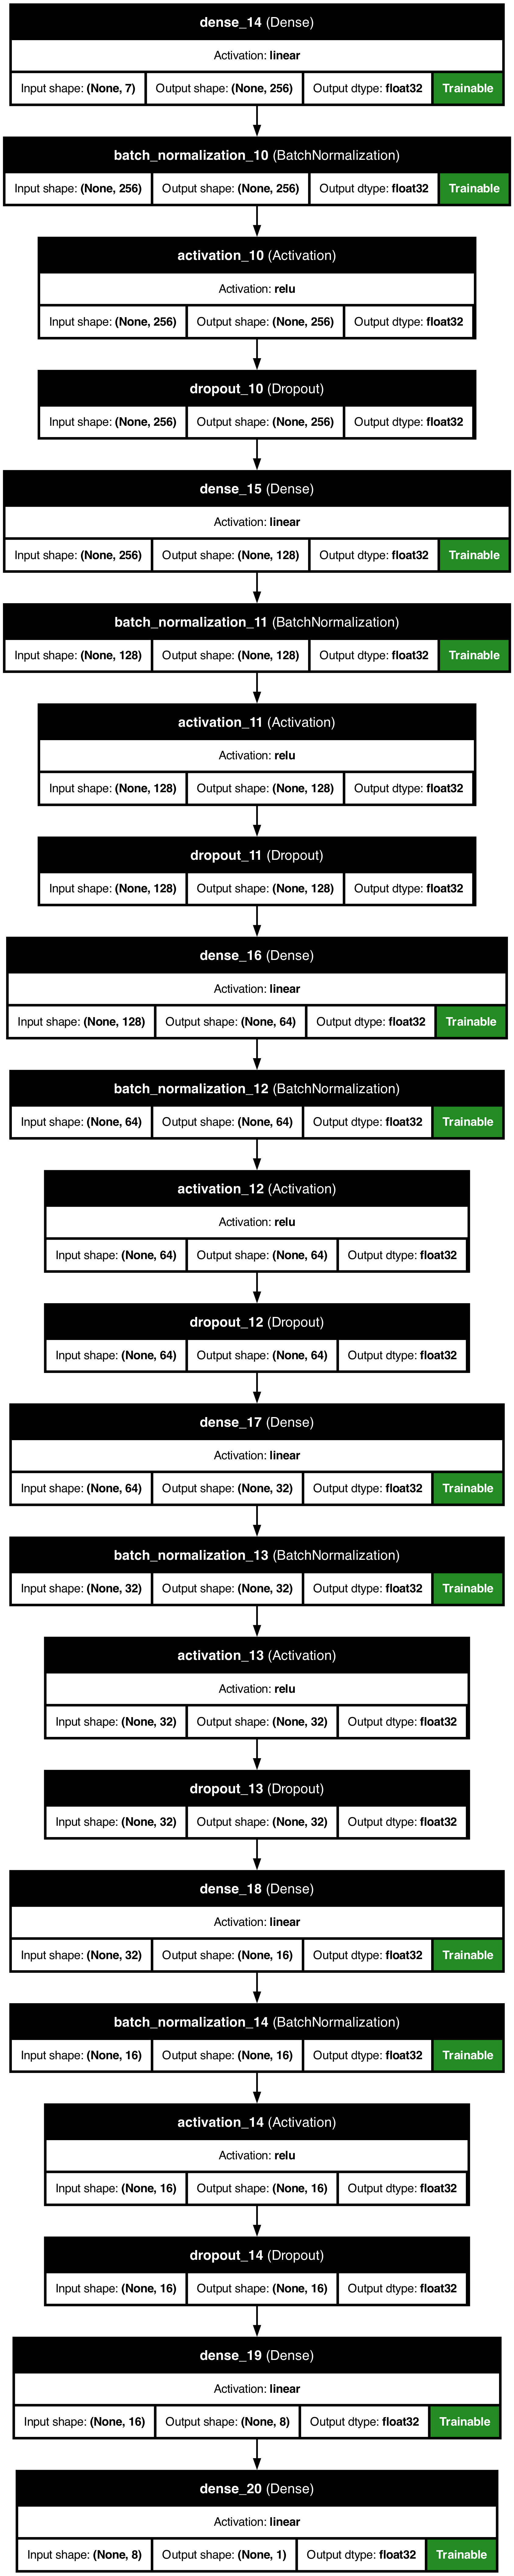

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
import tensorflow as tf

model = Sequential([
    Dense(256, input_shape=(7,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05), 
    
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05), 
    
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05), 
    
    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05), 
    
    Dense(16),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05), 
    
    Dense(8),
    Dense(1)
])

model.summary()

tf.keras.utils.plot_model(model, 
                          show_dtype=True,
                          show_layer_activations=True, 
                          show_layer_names=True, 
                          show_shapes=True, 
                          show_trainable=True)


In [65]:
model.compile(loss='mean_squared_error',
             optimizer=tf.optimizers.Adam(learning_rate=0.001), 
            metrics=['MSE'])

history = model.fit (X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    verbose=2,
                    epochs=100)

Epoch 1/100
18/18 - 3s - 183ms/step - MSE: 1131.8029 - loss: 1131.8029 - val_MSE: 1225.4768 - val_loss: 1225.4768
Epoch 2/100
18/18 - 0s - 6ms/step - MSE: 1076.8678 - loss: 1076.8678 - val_MSE: 1197.7505 - val_loss: 1197.7505
Epoch 3/100
18/18 - 0s - 6ms/step - MSE: 1020.7558 - loss: 1020.7558 - val_MSE: 1168.1510 - val_loss: 1168.1510
Epoch 4/100
18/18 - 0s - 6ms/step - MSE: 962.3062 - loss: 962.3062 - val_MSE: 1129.8800 - val_loss: 1129.8800
Epoch 5/100
18/18 - 0s - 6ms/step - MSE: 893.2770 - loss: 893.2770 - val_MSE: 1066.4380 - val_loss: 1066.4380
Epoch 6/100
18/18 - 0s - 6ms/step - MSE: 821.5380 - loss: 821.5380 - val_MSE: 988.9808 - val_loss: 988.9808
Epoch 7/100
18/18 - 0s - 6ms/step - MSE: 741.9576 - loss: 741.9576 - val_MSE: 915.4907 - val_loss: 915.4907
Epoch 8/100
18/18 - 0s - 6ms/step - MSE: 666.1133 - loss: 666.1133 - val_MSE: 841.2474 - val_loss: 841.2474
Epoch 9/100
18/18 - 0s - 6ms/step - MSE: 581.9018 - loss: 581.9018 - val_MSE: 758.4338 - val_loss: 758.4338
Epoch 10/1

Epoch 78/100
18/18 - 0s - 6ms/step - MSE: 51.5512 - loss: 51.5512 - val_MSE: 88.7696 - val_loss: 88.7696
Epoch 79/100
18/18 - 0s - 6ms/step - MSE: 48.7385 - loss: 48.7385 - val_MSE: 86.6692 - val_loss: 86.6692
Epoch 80/100
18/18 - 0s - 6ms/step - MSE: 48.9145 - loss: 48.9145 - val_MSE: 103.0536 - val_loss: 103.0536
Epoch 81/100
18/18 - 0s - 6ms/step - MSE: 52.8392 - loss: 52.8392 - val_MSE: 101.3177 - val_loss: 101.3177
Epoch 82/100
18/18 - 0s - 6ms/step - MSE: 53.3435 - loss: 53.3435 - val_MSE: 93.3871 - val_loss: 93.3871
Epoch 83/100
18/18 - 0s - 6ms/step - MSE: 50.7009 - loss: 50.7009 - val_MSE: 98.6600 - val_loss: 98.6600
Epoch 84/100
18/18 - 0s - 6ms/step - MSE: 51.0675 - loss: 51.0675 - val_MSE: 99.3051 - val_loss: 99.3051
Epoch 85/100
18/18 - 0s - 6ms/step - MSE: 48.0939 - loss: 48.0939 - val_MSE: 105.1871 - val_loss: 105.1871
Epoch 86/100
18/18 - 0s - 6ms/step - MSE: 54.7868 - loss: 54.7868 - val_MSE: 91.2111 - val_loss: 91.2111
Epoch 87/100
18/18 - 0s - 6ms/step - MSE: 54.2339

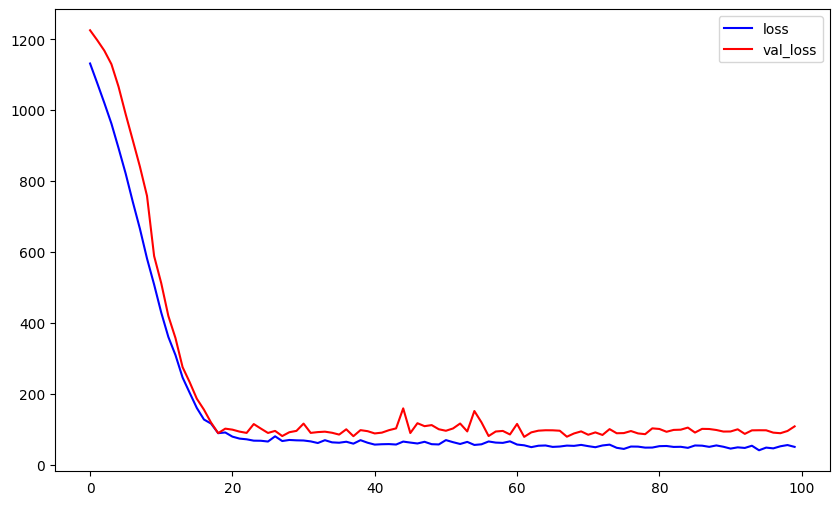

In [66]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'],
        c='b', label='loss')
plt.plot(history.history['val_loss'],
        c='r', label='val_loss')
plt.legend()

In [67]:
model.evaluate (X_train_scaled, y_train)
model.evaluate (X_val_scaled, y_val)
model.evaluate (X_test_scaled, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 23.7428 - loss: 23.7428 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - MSE: 106.4496 - loss: 106.4496
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MSE: 157.7433 - loss: 157.7433 


[141.99493408203125, 141.99493408203125]

In [68]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test_scaled)

print (r2_score(y_test, y_pred))
print (mean_squared_error(y_test, y_pred))
print (root_mean_squared_error(y_test, y_pred))
print (mean_absolute_error(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0.19513654708862305
141.99494092630087
11.916163011905336
8.058795656476702
